In [14]:
# Tematem naszego projektu jest emigracja ludności, czyli wyjazd za granicę państwa na określony czas lub 
# w celu zamieszkania tam na stałe. Zjawisko z każdym kolejnym rokiem, jest coraz bardziej odczuwalne dla naszego 
# Państwa, jednak warto przyjrzeć się też chociażby naszym sąsiadom. 

In [15]:
# Zaimportujmy kilka bibliotek, dzięki, którym możliwe będzie przedstawienie wyników badań. 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [16]:
# Przygotujmy klasę odpowiedzlaną za podstawowe operacje na plikach co ułatwi naszą pracę oraz dzięki czemu kod stanie się bardziej przejrzysty.
class Analysis:
    file_name = ''
    def __init__(self, file_name):
        self.file_name = file_name
    
    def read(self, skip_rows):
        df=pd.read_excel(self.file_name, skiprows=skip_rows)
        return df

In [17]:
# Poniżej prezentujemy wyniki badań z serwisu eurostat, dotyczące emigracji w przeciągu lat, w określonych miejscach.
df=Analysis('migr_emi2.xls')
df=df.read(11)
df

,GEO/TIME,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Belgium,66013,84148,93600,102657,94573,89794,92471,89690,88935,102936
1,Bulgaria,:,:,16615,19678,28727,29470,30570,31586,33225,39941
2,Czechia,61069,55910,46106,25894,28468,25684,38864,27316,26742,77798
3,Denmark,41456,41593,43663,43310,44426,44625,52654,56403,60381,66520
4,Germany (until 1990 former territory of the FRG),252456,249045,240001,259328,324221,338403,533762,560700,540415,576319
5,Estonia,5294,6214,6321,6740,4637,13003,13792,12358,10476,12801
6,Ireland,78099,83049,81797,76560,71107,67160,62056,64068,53735,62004
7,Greece,62041,92404,124694,117094,106804,109351,106535,103327,103049,95020
8,Spain,403377,409034,446606,532303,400430,343875,327325,368860,309526,296248
9,France,269531,291594,255922,239813,308103,324517,313622,215470,300668,299101


In [18]:
# Treść pliku nie prezentuje się w sposób nas satysfakcjonujący. 
# W pierwszej kolejności zmienimy pierwszą komórkę, następnie przytnieny więc końcówkę statystyki, 
# z miejscami, w których dane nie zostały pobrane/ujawnione. 
df = df.rename(columns={'GEO/TIME':'LOKALIZACJA / ROK'})
df=df.iloc[:33]
df

,LOKALIZACJA / ROK,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Belgium,66013,84148,93600,102657,94573,89794,92471,89690,88935,102936
1,Bulgaria,:,:,16615,19678,28727,29470,30570,31586,33225,39941
2,Czechia,61069,55910,46106,25894,28468,25684,38864,27316,26742,77798
3,Denmark,41456,41593,43663,43310,44426,44625,52654,56403,60381,66520
4,Germany (until 1990 former territory of the FRG),252456,249045,240001,259328,324221,338403,533762,560700,540415,576319
5,Estonia,5294,6214,6321,6740,4637,13003,13792,12358,10476,12801
6,Ireland,78099,83049,81797,76560,71107,67160,62056,64068,53735,62004
7,Greece,62041,92404,124694,117094,106804,109351,106535,103327,103049,95020
8,Spain,403377,409034,446606,532303,400430,343875,327325,368860,309526,296248
9,France,269531,291594,255922,239813,308103,324517,313622,215470,300668,299101


In [19]:
# Dla przejrzystości danych i poprawnej dalszej analizy zmieńmy nazwę komórki Niemiec
df = df.replace(['Germany (until 1990 former territory of the FRG)'], 'Germany')
df

,LOKALIZACJA / ROK,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Belgium,66013,84148,93600,102657,94573,89794,92471,89690,88935,102936
1,Bulgaria,:,:,16615,19678,28727,29470,30570,31586,33225,39941
2,Czechia,61069,55910,46106,25894,28468,25684,38864,27316,26742,77798
3,Denmark,41456,41593,43663,43310,44426,44625,52654,56403,60381,66520
4,Germany,252456,249045,240001,259328,324221,338403,533762,560700,540415,576319
5,Estonia,5294,6214,6321,6740,4637,13003,13792,12358,10476,12801
6,Ireland,78099,83049,81797,76560,71107,67160,62056,64068,53735,62004
7,Greece,62041,92404,124694,117094,106804,109351,106535,103327,103049,95020
8,Spain,403377,409034,446606,532303,400430,343875,327325,368860,309526,296248
9,France,269531,291594,255922,239813,308103,324517,313622,215470,300668,299101


In [20]:
# Jak widać w zestawieniu są obecne 33 pozycje. Do porównania daleko szukać nie trzeba, 
# dlatego też poniżej prezentujemy okrojone (dostępne) dane tzn. Polska i kraje sąsiednie.

df2= df[df['LOKALIZACJA / ROK'] == 'Poland' ]
sasiedzi = ['Germany', 'Czechia', 'Slovakia', 'Ukraine', 'Belarus', 'Lithuania', 'Russia']
for sasiad in sasiedzi:
    df2 = df2.append(df[df['LOKALIZACJA / ROK'] == sasiad])
    if (~(df2['LOKALIZACJA / ROK'].eq(sasiad).any())):
        print("brak " + sasiad + " w zestawieniu")

df2



brak Ukraine w zestawieniu
brak Belarus w zestawieniu
brak Russia w zestawieniu


,LOKALIZACJA / ROK,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
20,Poland,218126,265798,275603,276446,268299,258837,236441,218492,189794,180594
4,Germany,252456,249045,240001,259328,324221,338403,533762,560700,540415,576319
2,Czechia,61069,55910,46106,25894,28468,25684,38864,27316,26742,77798
24,Slovakia,1889,1863,2003,2770,3644,3870,3801,3466,3298,3384
14,Lithuania,83157,53863,41100,38818,36621,44533,50333,47925,32206,29273


In [21]:
# Aby tabela wyglądała estetyczniej, zastąpimy obecne indeksy, numerami w kolejności, zaczynając od 0
df2.reset_index(drop=True, inplace=True)
df2

,LOKALIZACJA / ROK,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Poland,218126,265798,275603,276446,268299,258837,236441,218492,189794,180594
1,Germany,252456,249045,240001,259328,324221,338403,533762,560700,540415,576319
2,Czechia,61069,55910,46106,25894,28468,25684,38864,27316,26742,77798
3,Slovakia,1889,1863,2003,2770,3644,3870,3801,3466,3298,3384
4,Lithuania,83157,53863,41100,38818,36621,44533,50333,47925,32206,29273


In [30]:
# Niestety nie wszystkie państwa zostały zawarte w ogólnym porównaniu, jednak sprawdźmy jak wypadamy na tle uzyskanych danych. Porównajmy sobie maksymalne wyniki (z tabeli Polska i dostępni sąsiedzi).
lata = df2.head(0)
for rok in lata:
    df3 = df2.append(df2[df2[rok]==df2[rok].max()])

# df3.reset_index(drop=True, inplace=True)
df3



,LOKALIZACJA / ROK,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Poland,218126,265798,275603,276446,268299,258837,236441,218492,189794,180594
1,Germany,252456,249045,240001,259328,324221,338403,533762,560700,540415,576319
2,Czechia,61069,55910,46106,25894,28468,25684,38864,27316,26742,77798
3,Slovakia,1889,1863,2003,2770,3644,3870,3801,3466,3298,3384
4,Lithuania,83157,53863,41100,38818,36621,44533,50333,47925,32206,29273
1,Germany,252456,249045,240001,259328,324221,338403,533762,560700,540415,576319


In [33]:
# Aby wynik był bardziej przejrzysty, oraz aby zaprezentować jak rozkładało się to na przestrzeni lat w naszym kraju, poniżej wyświetlimy wykres.
# Zacznijmy zaetem od przygotowania danych.

df9 = df[df['LOKALIZACJA / ROK'] == 'Poland']
df9=df9.rename(columns={'LOKALIZACJA / ROK':'ROK'})
df9.reset_index(drop=True, inplace=True)
df9 = df9.set_index(['ROK'])
df9 = df9.T
df9['Poland']=df9['Poland'].astype(float)
df9.dtypes
df9


ROK,Poland
2010,218126.0
2011,265798.0
2012,275603.0
2013,276446.0
2014,268299.0
2015,258837.0
2016,236441.0
2017,218492.0
2018,189794.0
2019,180594.0


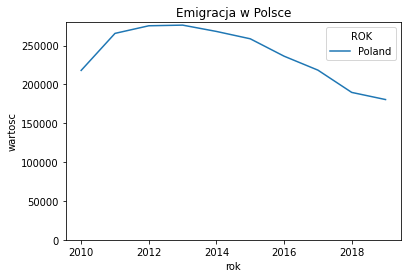

In [31]:
# Przygotujmy wstępny wykres z naszych danych, zapiszmy go do PDF'a
df9.plot()
plt.ylabel('wartosc')
plt.xlabel('rok')
plt.title('Emigracja w Polsce')
plt.savefig('poland-emigration.pdf')

In [25]:
# Wyświetlmy lata z największą oraz najmniejszą migracją
df_poland_m = df9
print("Największa migracja: \n", df_poland_m.loc[df_poland_m.idxmax()])
print("Najmniejsza migracja: \n", df_poland_m.loc[df_poland_m.idxmin()])

Największa migracja: 
 ROK     Poland
2013  276446.0
Najmniejsza migracja: 
 ROK     Poland
2019  180594.0


In [26]:
# Z powyższej tabeli wynika, że Polska od 2010 jest, niestety, na czele. Który kraj jest w takim razie najbezpieczniejszy? Poniżej przedstawiamy minimalne wyniki.
for rok in lata:
    df4 = df4.append(df2[df2[rok]==df2[rok].min()])

df4.reset_index(drop=True, inplace=True)
df4

NameError: name 'df4' is not defined

In [ ]:
# Aby zaspokoić ciekawość sprawdźmy maksymalny wynik z tabeli, która zawierała 33 kraje.
df.max()


In [ ]:
# Jak widać (znacznie)(nie)odstaje on od naszych rekordów. Porównajmy w takim razie, również najniższy wynik, aby sprawdzić jak wypada on na tle naszego sąsiada - Słowacja.
df.min()

In [ ]:
#tutaj luźno zapiszę propozycje - wykresy: najwiecej migracji per rok, migracje per kraj(suma 2010-2019), i cos na tle polski
#zapisac na koniec wykresy do pdfów plt.savefig('wykres.pdf')

In [ ]:
#lista gdzie kraj z max/rok
df_helper=df.rename(columns={'LOKALIZACJA / ROK':'ROK'})
df_helper.reset_index(drop=True, inplace=True)
df_helper = df_helper.set_index(['ROK'])
df_helper = df_helper.T
df_helper